# Exploratory Data analysis 

This notebook contains a code to inspect [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic).


In [1]:
import pandas as pd # Data analysis library

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fig_params={'legend.fontsize':18,
          'axes.labelsize': 18,
          'axes.titlesize':20,
          'xtick.labelsize':16,
          'ytick.labelsize':16,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)

## 1. Loading and overview of the dataset

In [2]:
df=pd.read_csv('./data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Age', 'Cabin' and 'Embarked' features have few NaN values. 
 Almost 77% values of 'Cabin' are NaN. Therefore, this feature is not included in any model.

### **Inspect NaN values**

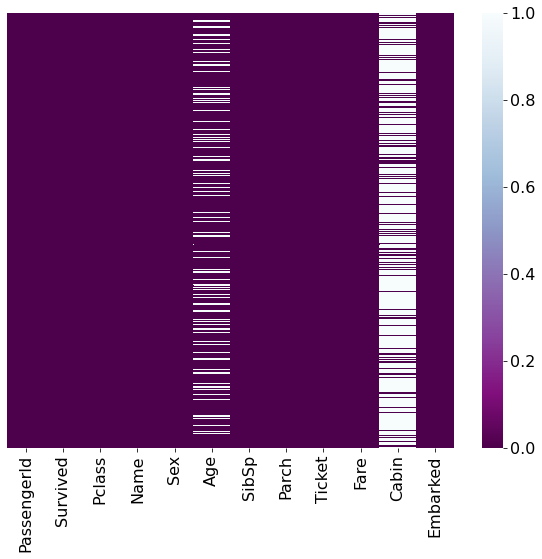

In [6]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='BuPu_r',yticklabels=False)
plt.show()

## 2. Exploratory data analysis

### **People survived**

Total not survived : 549
Total survived : 342


/home/chaitanya/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


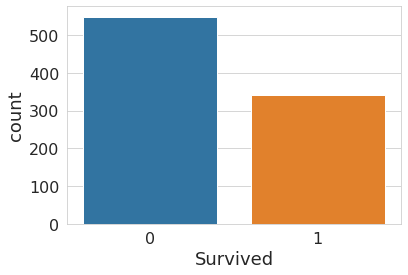

In [7]:
print('Total not survived :',(df['Survived']==0).sum())
print('Total survived :',(df['Survived']==1).sum())

sns.set_style('whitegrid')
sns.countplot(df['Survived'])
plt.show()

Total number of survivors male  :  109
Total number of survivors female :  233

Total number of deaths male  :  468
Total number of deaths female :  81


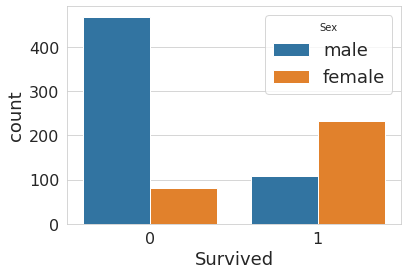

In [8]:
print('Total number of survivors male  : ',((df['Sex']=='male') & (df['Survived']==1)).sum())
print('Total number of survivors female : ',((df['Sex']=='female') & (df['Survived']==1)).sum())
print()
print('Total number of deaths male  : ',((df['Sex']=='male') & (df['Survived']==0)).sum())
print('Total number of deaths female : ',((df['Sex']=='female') & (df['Survived']==0)).sum())

sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

Total number of survivors Pclass 1 :  136
Total number of survivors Pclass 2 :  87
Total number of survivors Pclass 3 :  119

Total number of deaths Pclass 1 :  80
Total number of deaths Pclass 2 :  97
Total number of deaths Pclass 3 :  372


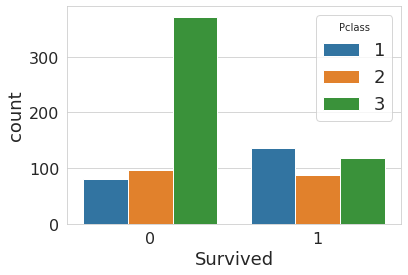

In [9]:
print('Total number of survivors Pclass 1 : ',((df['Pclass']==1) & (df['Survived']==1)).sum())
print('Total number of survivors Pclass 2 : ',((df['Pclass']==2) & (df['Survived']==1)).sum())
print('Total number of survivors Pclass 3 : ',((df['Pclass']==3) & (df['Survived']==1)).sum())
print()
print('Total number of deaths Pclass 1 : ',((df['Pclass']==1) & (df['Survived']==0)).sum())
print('Total number of deaths Pclass 2 : ',((df['Pclass']==2) & (df['Survived']==0)).sum())
print('Total number of deaths Pclass 3 : ',((df['Pclass']==3) & (df['Survived']==0)).sum())

sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

No. of Males in Pclass 1 :  122
No. of females in Pclass 1 :  94

No. of Males in Pclass 2 :  108
No. of females in Pclass 2 :  76

No. of Males in Pclass 3 :  347
No. of females in Pclass 3 :  144


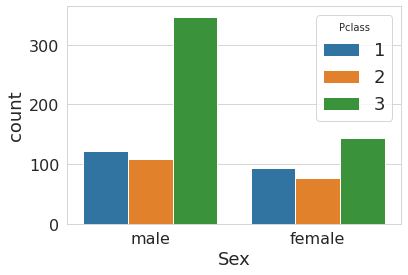

In [10]:
print('No. of Males in Pclass 1 : ',((df['Pclass']==1) & (df['Sex']=='male')).sum())
print('No. of females in Pclass 1 : ',((df['Pclass']==1) & (df['Sex']=='female')).sum())
print()
print('No. of Males in Pclass 2 : ',((df['Pclass']==2) & (df['Sex']=='male')).sum())
print('No. of females in Pclass 2 : ',((df['Pclass']==2) & (df['Sex']=='female')).sum())
print()
print('No. of Males in Pclass 3 : ',((df['Pclass']==3) & (df['Sex']=='male')).sum())
print('No. of females in Pclass 3 : ',((df['Pclass']==3) & (df['Sex']=='female')).sum())

sns.countplot(x='Sex',hue='Pclass',data=df)
plt.show()

Males in Pclass 1 (survived) :  45 
  deaths :  77
Females in Pclass 1 (survived) :  91 
  deaths :  3

Males in Pclass 2 (survived) :  17 
  deaths :  91
Females in Pclass 2 (survived) :  70 
  deaths :  6

Males in Pclass 3 (survived) :  47 
  deaths :  300
Females in Pclass 3 (survived) :  72 
  deaths :  72



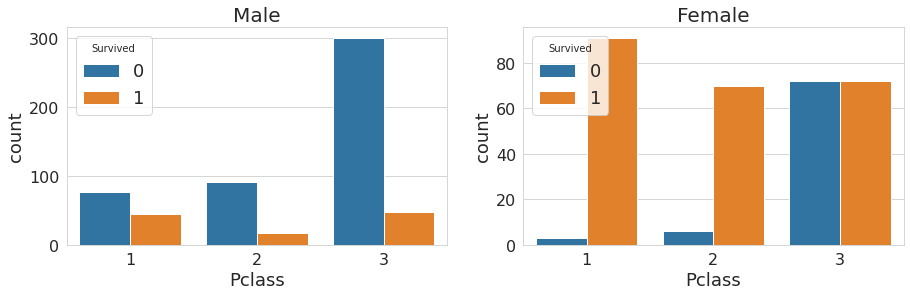

In [11]:
df_male=df[df['Sex']=='male']
df_female=df[df['Sex']=='female']

print('Males in Pclass 1 (survived) : ',((df_male['Pclass']==1) & (df_male['Survived']==1)).sum(),\
      '\n  deaths : ',((df_male['Pclass']==1) & (df_male['Survived']==0)).sum())
print('Females in Pclass 1 (survived) : ',((df_female['Pclass']==1) & (df_female['Survived']==1)).sum(),\
      '\n  deaths : ',((df_female['Pclass']==1) & (df_female['Survived']==0)).sum())
print()
print('Males in Pclass 2 (survived) : ',((df_male['Pclass']==2) & (df_male['Survived']==1)).sum(),\
      '\n  deaths : ',((df_male['Pclass']==2) & (df_male['Survived']==0)).sum())
print('Females in Pclass 2 (survived) : ',((df_female['Pclass']==2) & (df_female['Survived']==1)).sum(),\
      '\n  deaths : ',((df_female['Pclass']==2) & (df_female['Survived']==0)).sum())
print()
print('Males in Pclass 3 (survived) : ',((df_male['Pclass']==3) & (df_male['Survived']==1)).sum(),\
      '\n  deaths : ',((df_male['Pclass']==3) & (df_male['Survived']==0)).sum())
print('Females in Pclass 3 (survived) : ',((df_female['Pclass']==3) & (df_female['Survived']==1)).sum(),\
      '\n  deaths : ',((df_female['Pclass']==3) & (df_female['Survived']==0)).sum())
print()



fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(ax=ax[0],x='Pclass',hue='Survived',data=df_male)
sns.countplot(ax=ax[1],x='Pclass',hue='Survived',data=df_female)
ax[0].set_title('Male');ax[1].set_title('Female')
plt.show()

### **Age distribution**

/home/chaitanya/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


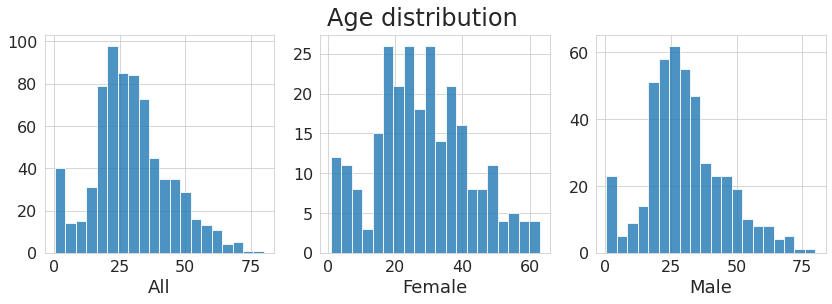

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(14,4))
fig.suptitle('Age distribution',fontsize=24)
sns.distplot(ax=ax[0],x=df['Age'].dropna(),kde=False,bins=20,hist_kws=dict(alpha=0.8))
sns.distplot(ax=ax[1],x=df['Age'][df['Sex']=='female'].dropna(),kde=False,bins=20,hist_kws=dict(alpha=0.8))
sns.distplot(ax=ax[2],x=df['Age'][df['Sex']=='male'].dropna(),kde=False,bins=20,hist_kws=dict(alpha=0.8))
ax[0].set_xlabel('All')
ax[1].set_xlabel('Female')
ax[2].set_xlabel('Male')
plt.show()

### Passangers with siblings/spouce

Passangers without any siblings :  608


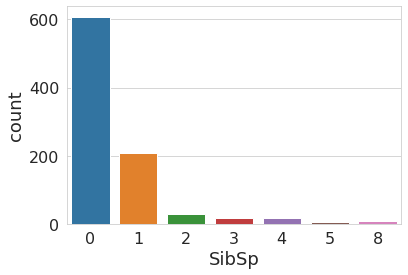

In [13]:
print('Passangers without any siblings : ',(df['SibSp']==0).sum())

sns.countplot(x='SibSp',data=df)
plt.show()

### Passangers with parents/children

Passangers without any accompanying parents/children :  678


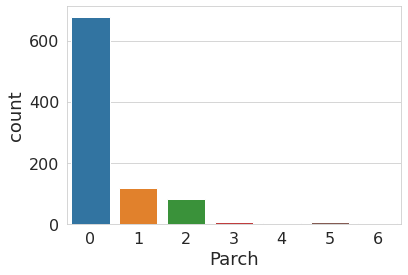

In [14]:
print('Passangers without any accompanying parents/children : ',(df['Parch']==0).sum())

sns.countplot(x='Parch',data=df)
plt.show()

In [18]:
df[df['Parch']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


### Fare distribution

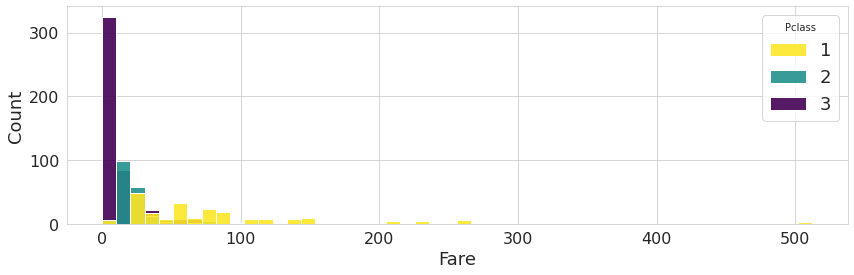

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(14,4))
sns.histplot(x='Fare',data=df,hue='Pclass',bins=50,palette='viridis_r',alpha=0.9)
plt.show()